## Dependencies

In [1]:
#dependencies

import os
import csv
import pandas as pd
import random

import sqlite3
import csv
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import numpy as np

from config import password

## create connection to SQL DB

In [2]:
pg_user = 'postgres'
pg_password = password
db_name = 'baseball_DB'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

In [3]:
engine.table_names()

['teams',
 'batting',
 'pitching',
 'players',
 'franchises',
 'salaries',
 'locations']

In [4]:
#create DF from sql tables
teamsStatsDF = pd.read_sql_table("teams", con = engine)
battingDF = pd.read_sql_table("batting", con = engine)
pitchingDF = pd.read_sql_table("pitching", con = engine)
playersDF = pd.read_sql_table("players", con = engine)
franchisesDF = pd.read_sql_table("franchises", con = engine)
salariesDF = pd.read_sql_table("salaries", con = engine)
teamsDF = pd.read_sql_table("locations", con = engine)


In [5]:
teamsStatsDF.head()

,franchiseID,teamID,name,yearID,G,W,R,H,HR,BB,SO,SB,RA,ERA,HA,HRA,BBA,SOA,statID,teamIDy
0,BNA,BS1,Boston Red Stockings,1871,31,20,401,426,3,60.0,19.0,73.0,303,3.55,367,2,42,23,1000,BS1-1871
1,CNA,CH1,Chicago White Stockings,1871,28,19,302,323,10,60.0,22.0,69.0,241,2.76,308,6,28,22,1003,CH1-1871
2,CFC,CL1,Cleveland Forest Citys,1871,29,10,249,328,7,26.0,25.0,18.0,341,4.11,346,13,53,34,1008,CL1-1871
3,KEK,FW1,Fort Wayne Kekiongas,1871,19,7,137,178,2,33.0,9.0,16.0,243,5.17,261,5,21,17,1015,FW1-1871
4,NNA,NY2,New York Mutuals,1871,33,16,302,403,1,33.0,15.0,46.0,313,3.72,373,7,42,22,1024,NY2-1871


In [6]:
falseOutput = teamsStatsDF[["yearID","teamID"]]
falseOutput["actual"] = teamsStatsDF.W / teamsStatsDF.G
falseOutput["model"] = ""
falseOutput["teamOnly"] = ""
for index, row in teamsStatsDF.iterrows():
    teamID = row["teamID"]
    teamOnly = teamID.split("-")[0]
    randPct = random.random()
    falseOutput.at[index, "model"] = randPct
    falseOutput.at[index, "teamOnly"] = teamOnly
falseOutput.head()

C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,yearID,teamID,actual,model,teamOnly
0,1871,BS1,0.645161,0.560233,BS1
1,1871,CH1,0.678571,0.176603,CH1
2,1871,CL1,0.344828,0.497828,CL1
3,1871,FW1,0.368421,0.534636,FW1
4,1871,NY2,0.484848,0.282059,NY2


In [7]:
# create a df as itemized teams for each year

formodel = teamsStatsDF[["yearID", "teamIDy"]]
formodel["Games"] = teamsStatsDF["G"]
formodel["Wins"] = teamsStatsDF["W"]
#formodel["WinPCT_actual"] = teamsStatsDF.W / teamsStatsDF.G
#formodel["model"] = ""
#formodel["teamOnly"] = ""
for index, row in teamsStatsDF.iterrows():
    teamID = row["teamIDy"]
    teamOnly = teamID.split("-")[0]
    #randPct = random.random()
    #formodel.at[index, "model"] = randPct
    #formodel.at[index, "teamOnly"] = teamOnly
formodel.head()

C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,yearID,teamIDy,Games,Wins
0,1871,BS1-1871,31,20
1,1871,CH1-1871,28,19
2,1871,CL1-1871,29,10
3,1871,FW1-1871,19,7
4,1871,NY2-1871,33,16


In [80]:
#assign the data to X and y
#X = formodel[['yearID', 'teamIDy', 'Games']]

X = formodel['Games'].values.reshape(-1, 1)
y = formodel['Wins'].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (2925, 1) (2925, 1)


array([[ 31],
       [ 28],
       [ 29],
       ...,
       [162],
       [162],
       [162]], dtype=int64)

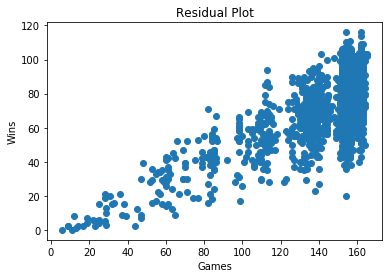

In [81]:
plt.scatter(X, y)
plt.title("Residual Plot")
plt.xlabel("Games")
plt.ylabel("Wins")
plt.show()

## create the model

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
#fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
model.score(X, y)

0.4493753275818845

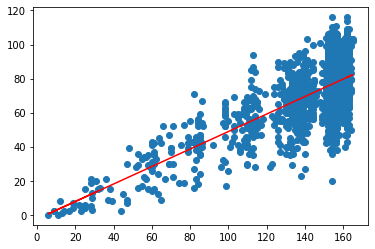

In [85]:
# Plot the data and the linear function
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

In [86]:
#coefficient and the intercept

print('Weight coefficients: ', lm.coef_)
print('y-axis intercept: ', lm.intercept_)



Weight coefficients:  [[0.51341668]]
y-axis intercept:  [-2.42334578]


In [87]:
#write the equation
#y = .51x -2.42

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predictions = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 169.00580984429035
R-squared (R2 ): 0.4493753275818845


In [89]:
# Overall Score for the model
model.score(X, y)

0.4493753275818845

In [90]:
#create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


In [91]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
model.score(X_test, y_test)

0.49565874890498296

In [93]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## fit the model to the scaled training data and make predictions using the scaled test data

In [94]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -1.5939970177813598
Testing Score: -1.0871637142827884


In [96]:
predictions = model.predict(X_test_scaled)

In [97]:
model.score(X_test, y_test)

-1.0871637142827884

In [100]:
model.score(X_train, y_train)

-1.5939970177813598

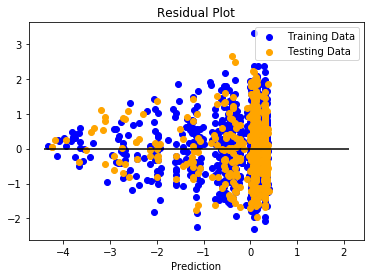

In [101]:
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error


MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6184195851942609, R2: 0.49565874890498307


In [103]:
predictions

array([[ 0.31974902],
       [ 0.34951047],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.31974902],
       [-0.42428731],
       [-0.33500295],
       [-3.10281809],
       [ 0.11141885],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.1411803 ],
       [-0.00762697],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.11141885],
       [ 0.11141885],
       [-0.45404876],
       [ 0.31974902],
       [-0.57309458],
       [ 0.28998757],
       [ 0.11141885],
       [ 0.31974902],
       [ 0.23046466],
       [-0.60285603],
       [ 0.1411803 ],
       [ 0.31974902],
       [ 0.11141885],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.08165739],
       [-0.57309458],
       [ 0.31974902],
       [-0.42428731],
       [ 0.31974902],
       [ 0.08165739],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.31974902],
       [ 0.11141885],
       [ 0.08165739],
       [ 0